<a href="https://colab.research.google.com/github/yleessam/dl/blob/main/4_3_regressor_house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.2 회귀 모델 실습

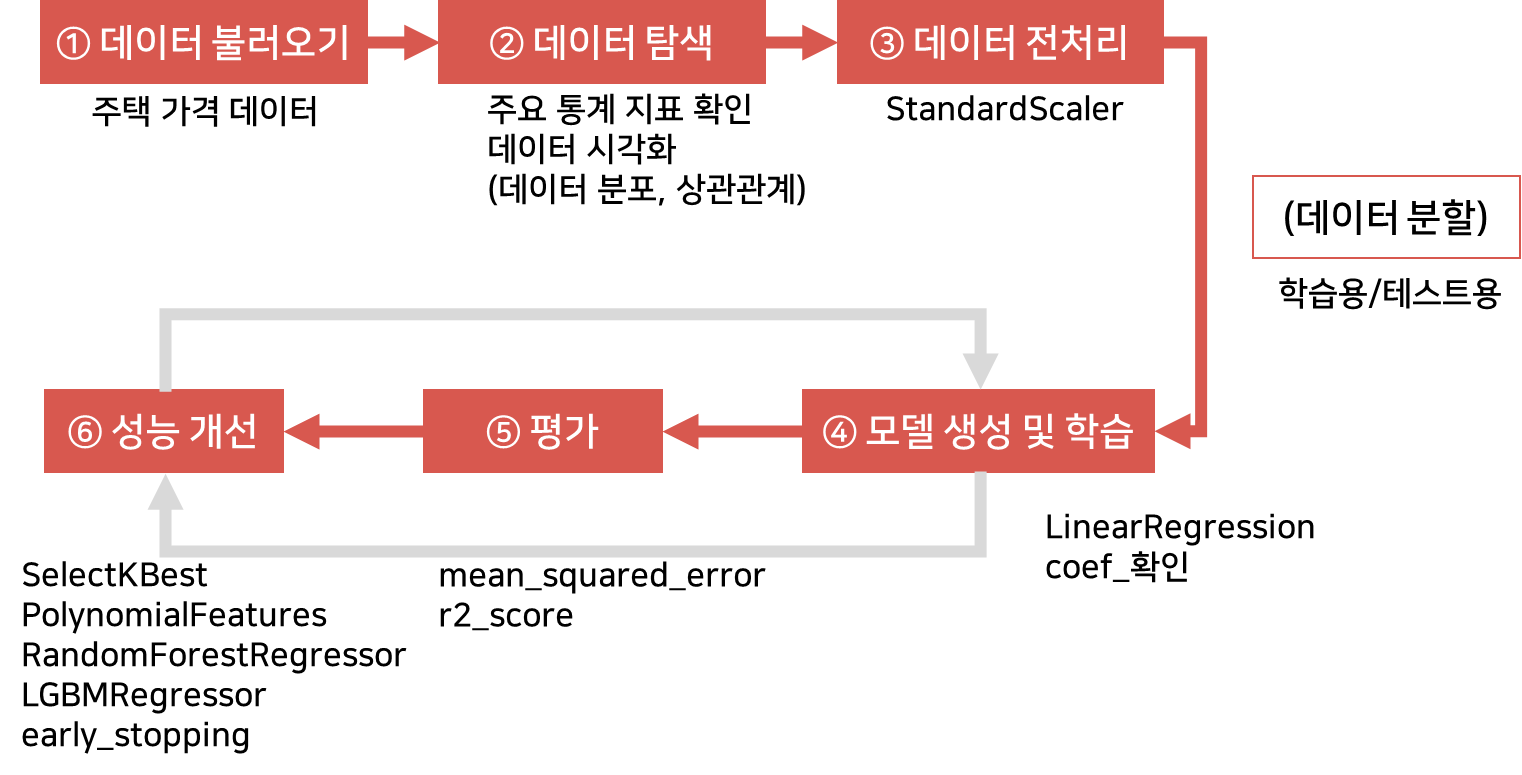

In [1]:
# 나눔폰트 설치(설치 후, 런타임 재시작 필요)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (19.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120874 files and direc

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') #한글폰트 설정
plt.rc('axes', unicode_minus=False) #마이너스 기호 표시

## 데이터 불러오기

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv('exercise4.csv', index_col=None)
df.head()

,평균 주택 면적,교통 편의지수,교육 점수,인구 밀집도,평균 주택 가격
0,83.910,16.0,67.021277,31.346578,34.8
1,88.920,24.0,55.319149,38.714128,36.6
2,95.925,96.0,80.851064,31.843267,43.4
3,100.170,16.0,36.170213,12.527594,57.2
4,92.430,8.0,22.340426,15.728477,48.2


## 데이터 탐색

In [5]:
df.describe()

,평균 주택 면적,교통 편의지수,교육 점수,인구 밀집도,평균 주택 가격
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,94.228740,37.976000,62.238298,30.096302,45.058000
std,10.544196,34.710359,23.038239,19.632020,18.237724
min,53.415000,4.000000,0.000000,0.000000,10.000000
25%,88.245000,16.000000,50.797872,14.514349,34.200000
50%,93.127500,20.000000,68.085106,26.572848,42.400000
75%,99.307500,96.000000,80.851064,41.901214,50.000000
max,131.700000,96.000000,100.000000,100.000000,100.000000


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53469 (\N{HANGUL SYLLABLE TAEG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47732 (\N{HANGUL SYLLABLE MYEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from current font.
  f

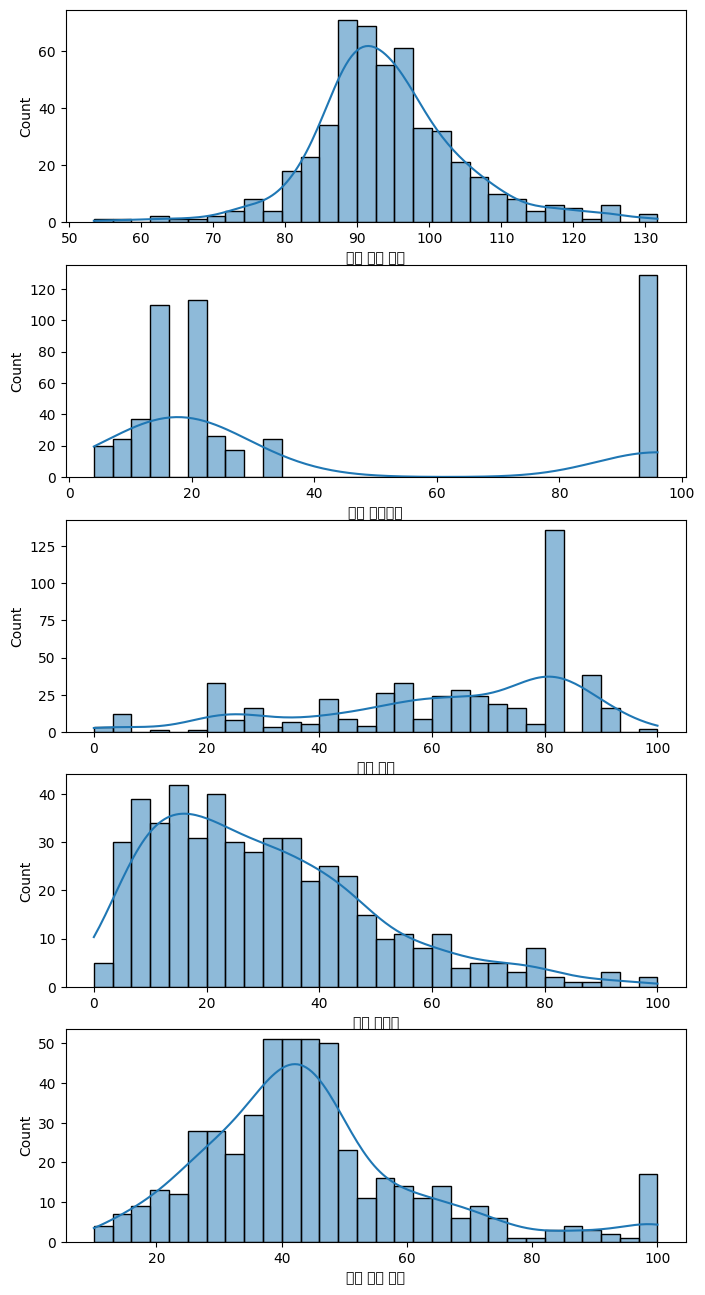

In [6]:
# 데이터 분포 확인 - 히스토그램
nrows = 5
ncols = 1

fig, axs = plt.subplots(nrows, ncols)
fig.set_size_inches(8, 16)

for i in range(len(df.columns)):
    sns.histplot(x=df.columns[i], data=df, kde=True, bins=30, ax=axs[i])

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53469 (\N{HANGUL SYLLABLE TAEG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47732 (\N{HANGUL SYLLABLE MYEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from current font.
  f

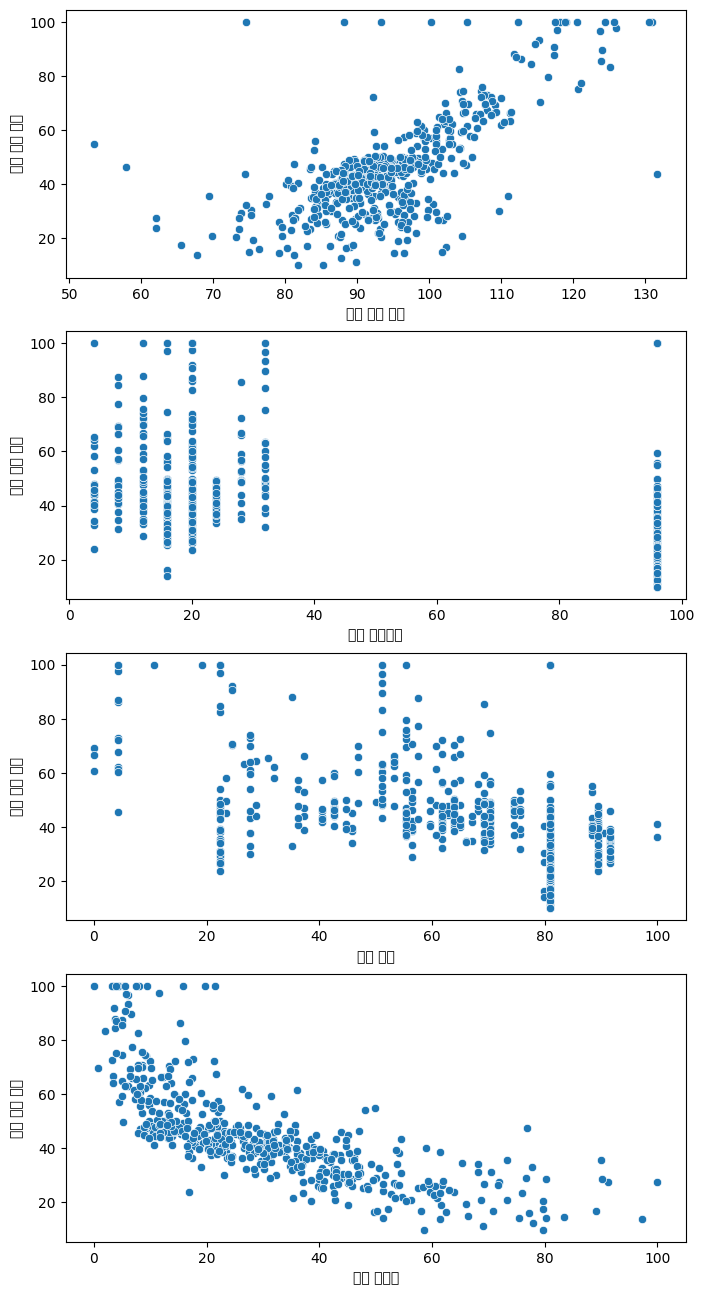

In [7]:
# 데이터 분포 확인 - 산점도
nrows = 4
ncols = 1

fig, axs = plt.subplots(nrows, ncols)
fig.set_size_inches(8, 16)

for i in range(len(df.columns) - 1):
    sns.scatterplot(x=df.columns[i], y='평균 주택 가격', data=df, ax=axs[i])

In [8]:
# 데이터 분포 확인 - 변수 간 상관관계
df.corr()

,평균 주택 면적,교통 편의지수,교육 점수,인구 밀집도,평균 주택 가격
평균 주택 면적,1.000000,-0.209952,-0.350765,-0.616391,0.694622
교통 편의지수,-0.209952,1.000000,0.462282,0.481111,-0.374742
교육 점수,-0.350765,0.462282,1.000000,0.368140,-0.500726
인구 밀집도,-0.616391,0.481111,0.368140,1.000000,-0.734713
평균 주택 가격,0.694622,-0.374742,-0.500726,-0.734713,1.000000


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 53469 (\N{HANGUL SYLLABLE TAEG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 47732 (\N{HANGUL SYLLABLE MYEON}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53469 (\N{HANGUL SYLLABLE TAEG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47732 (\N{HANGUL SYLLABLE MYEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from current font.
  f

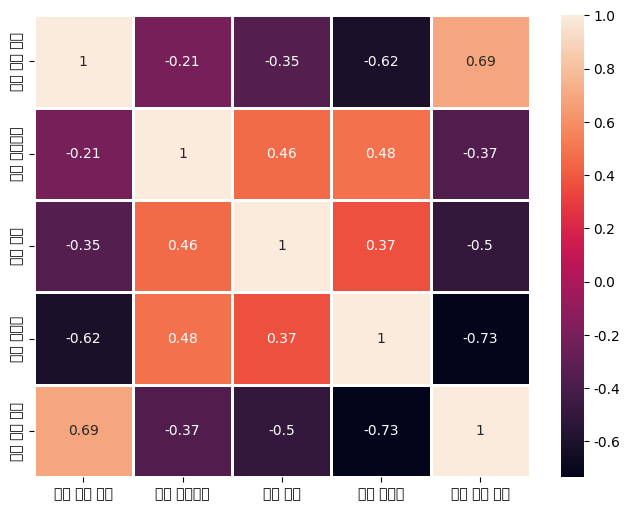

In [9]:
# 데이터 분포 확인 - 변수 간 상관관계(히트맵)
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), linewidths=1, annot=True)

In [10]:
np.abs(df.corr()['평균 주택 가격']).sort_values(ascending=False)

평균 주택 가격    1.000000
인구 밀집도      0.734713
평균 주택 면적    0.694622
교육 점수       0.500726
교통 편의지수     0.374742
Name: 평균 주택 가격, dtype: float64

In [11]:
df.sort_values(by=['평균 주택 가격']).tail()

,평균 주택 면적,교통 편의지수,교육 점수,인구 밀집도,평균 주택 가격
273,105.240,96.0,80.851064,3.394040,100.0
285,118.125,16.0,19.148936,3.421634,100.0
385,112.335,20.0,22.340426,0.000000,100.0
253,125.625,20.0,22.340426,4.387417,100.0
426,93.240,96.0,80.851064,21.523179,100.0


In [12]:
# 결측값 확인
df.isna().sum()

평균 주택 면적    0
교통 편의지수     0
교육 점수       0
인구 밀집도      0
평균 주택 가격    0
dtype: int64

In [13]:
# 중복값 확인
df.duplicated().sum()

0

## 데이터 전처리

In [14]:
y = df['평균 주택 가격']
X = df.drop(['평균 주택 가격'],axis=1,inplace=False)

In [15]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

## 학습

In [17]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print('weight:', lr_model.coef_)
print('bias:',lr_model.intercept_)

weight: [ 8.37360226 -0.68007229 -3.48014443 -6.39361632]
bias: 44.97676980530395


In [18]:
coef = pd.Series(data=np.round(lr_model.coef_, 1), index=X.columns )
coef

평균 주택 면적    8.4
교통 편의지수    -0.7
교육 점수      -3.5
인구 밀집도     -6.4
dtype: float64

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53469 (\N{HANGUL SYLLABLE TAEG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47732 (\N{HANGUL SYLLABLE MYEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from current font.
  f

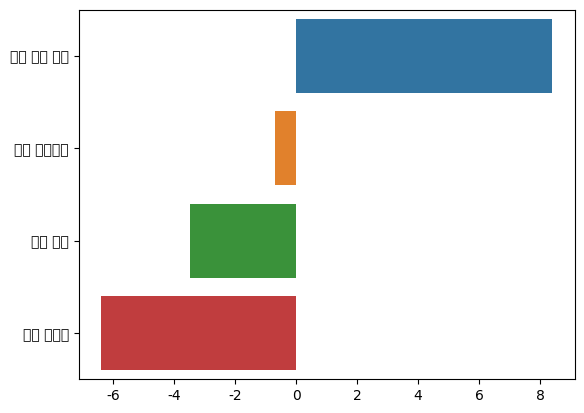

In [19]:
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

## 평가

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

def printRegressorResult(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print('MSE : {0:.3f} , RMSE : {1:.3f}, r2 : {2:.3f}'
    .format(mse , rmse, r2))

y_pred = lr_model.predict(X_test)
printRegressorResult(y_test, y_pred)

MSE : 138.472 , RMSE : 11.767, r2 : 0.560


In [21]:
result = pd.DataFrame({'y': y_test.values,
                       'y_pred': y_pred,
                       'diff': np.abs(y_test.values - y_pred)})
result.sort_values(by=['diff'], ascending=False).head()

,y,y_pred,diff
76,100.0,33.815985,66.184015
149,100.0,43.033172,56.966828
43,55.0,13.542672,41.457328
12,27.6,-7.328432,34.928432
109,46.2,11.557502,34.642498


## 성능개선


### ① 독립변수 선택

In [22]:
from sklearn.feature_selection import SelectKBest, f_regression

# k = 3
X_selected = SelectKBest(score_func = f_regression, k = 3)
X_selected.fit_transform(X, y)
features = X.columns[X_selected.get_support()]
print('features = {}'.format(features))

features = Index(['평균 주택 면적', '교육 점수', '인구 밀집도'], dtype='object')


In [23]:
X_selected = df[features].copy()
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

lr_model2 = LinearRegression()
lr_model2.fit(X_train, y_train)

y_pred = lr_model2.predict(X_test)
printRegressorResult(y_test, y_pred)

MSE : 135.585 , RMSE : 11.644, r2 : 0.569


### ② 다항회귀(PolynomialFeatures)모델

In [24]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X_selected)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

poly_model = LinearRegression()
poly_model.fit(X_train, y_train)

y_pred = poly_model.predict(X_test)
printRegressorResult(y_test, y_pred)

MSE : 95.010 , RMSE : 9.747, r2 : 0.698


In [25]:
X_selected.columns

Index(['평균 주택 면적', '교육 점수', '인구 밀집도'], dtype='object')

### ③ 데이터 스케일 변환

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53469 (\N{HANGUL SYLLABLE TAEG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47732 (\N{HANGUL SYLLABLE MYEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from current font.
  f

평균 주택 면적    0.399375
교육 점수      -0.797798
인구 밀집도      0.921644
dtype: float64

평균 주택 가격: 1.11


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50977 (\N{HANGUL SYLLABLE YUG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  func(*args

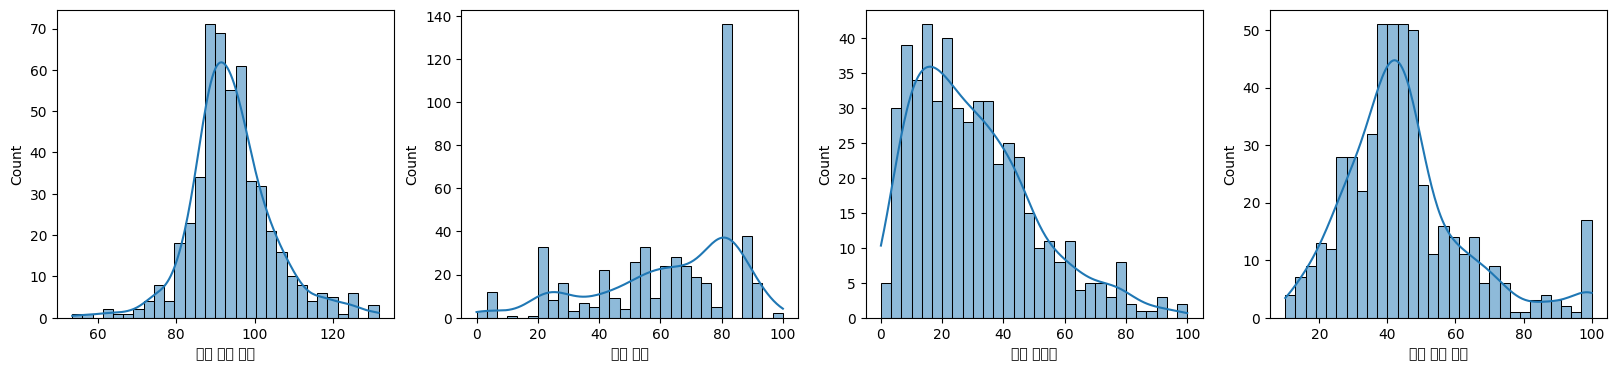

In [26]:
# 데이터 분포 확인 - 히스토그램
nrows = 1
ncols = 4

fig, axs = plt.subplots(nrows, ncols)
fig.set_size_inches(20, 4)

sns.histplot(x= X_selected.columns[0], data = X_selected, kde=True, bins=30, ax=axs[0])
sns.histplot(x= X_selected.columns[1], data = X_selected, kde=True, bins=30, ax=axs[1])
sns.histplot(x= X_selected.columns[2], data = X_selected, kde=True, bins=30, ax=axs[2])
sns.histplot(x= y, data = y, kde=True, bins=30, ax=axs[3])

print(X_selected.skew())
print('\n평균 주택 가격: {0:.2f}'.format(y.skew()))

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53469 (\N{HANGUL SYLLABLE TAEG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47732 (\N{HANGUL SYLLABLE MYEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from current font.
  f

평균 주택 면적    0.399375
교육 점수      -0.797798
인구 밀집도     -0.663896
dtype: float64

평균 주택 가격: -0.30


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50977 (\N{HANGUL SYLLABLE YUG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  func(*args

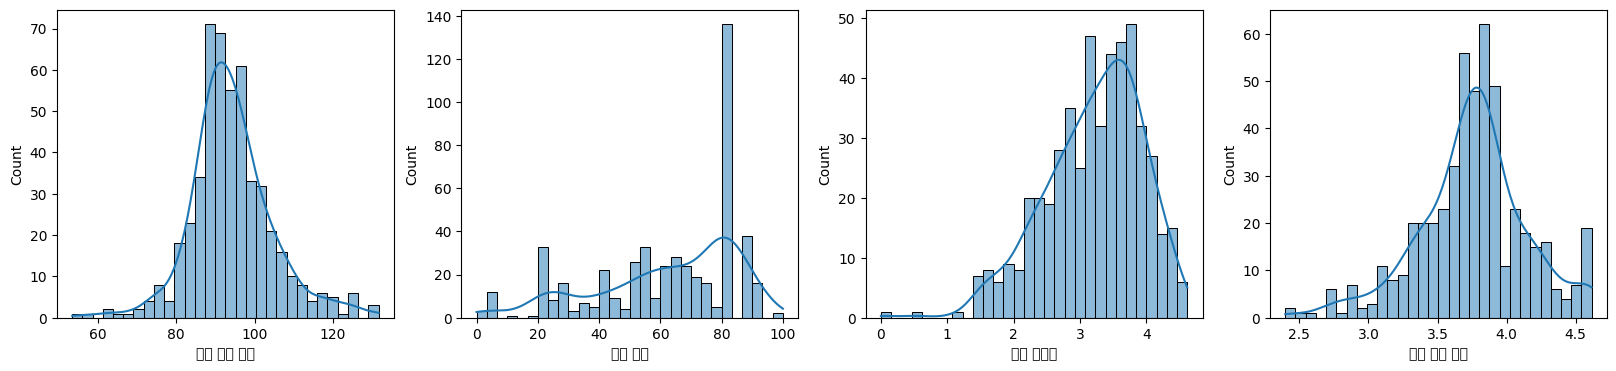

In [27]:
X_selected['인구 밀집도'] = np.log1p(X_selected['인구 밀집도'])
y = np.log1p(y)

# 데이터 분포 확인 - 히스토그램
nrows = 1
ncols = 4

fig, axs = plt.subplots(nrows, ncols)
fig.set_size_inches(20, 4)

sns.histplot(x= X_selected.columns[0], data = X_selected, kde=True, bins=30, ax=axs[0])
sns.histplot(x= X_selected.columns[1], data = X_selected, kde=True, bins=30, ax=axs[1])
sns.histplot(x= X_selected.columns[2], data = X_selected, kde=True, bins=30, ax=axs[2])
sns.histplot(x= y, data = y, kde=True, bins=30, ax=axs[3])

print(X_selected.skew())
print('\n평균 주택 가격: {0:.2f}'.format(y.skew()))

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

lr_model3 = LinearRegression()
lr_model3.fit(X_train, y_train)

y_pred = lr_model3.predict(X_test)
mse = mean_squared_error(np.expm1(y_test), np.expm1(y_pred))
rmse = np.sqrt(mse)
r2 = r2_score(np.expm1(y_test), np.expm1(y_pred))
print('MSE : {0:.3f} , RMSE : {1:.3f}, r2 : {2:.3f}'.format(mse , rmse, r2))

MSE : 90.757 , RMSE : 9.527, r2 : 0.711


### (Tip) 교차검증(cross_validate)

In [30]:
from sklearn.model_selection import cross_validate

# cv: 3개의 train, test set fold 로 나누어 학습
scores = cross_validate(lr_model, X, y, scoring="neg_mean_squared_error", cv=3, return_train_score=True, return_estimator=True)
print('Scores', scores)

mse = (-1 * scores['train_score'])
print('MSE:', mse)

rmse  = np.sqrt(-1 * scores['train_score'])
print('RMSE:', rmse)

print('RMSE 평균: {0:.3f} '.format(np.mean(rmse)))

Scores {'fit_time': array([0.00516748, 0.00387716, 0.00300407]), 'score_time': array([0.0022521 , 0.00188851, 0.00287938]), 'estimator': [LinearRegression(), LinearRegression(), LinearRegression()], 'test_score': array([-0.03280526, -0.0446345 , -0.05962279]), 'train_score': array([-0.05095414, -0.04485816, -0.03722167])}
MSE: [0.05095414 0.04485816 0.03722167]
RMSE: [0.22573024 0.21179746 0.19292918]
RMSE 평균: 0.210 


### ④ 의사결정나무 기반 회귀 모델

In [31]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [32]:
from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor(n_estimators=100, random_state=42)
lgb_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000125 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 268
[LightGBM] [Info] Number of data points in the train set: 350, number of used features: 3
[LightGBM] [Info] Start training from score 3.775011
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

LGBMRegressor(random_state=42)

In [33]:
model_list = [lr_model, forest_model, lgb_model]

for model in model_list:
    model.fit(X_train , y_train)
    y_preds = model.predict(X_test)
    mse = mean_squared_error(y_test, y_preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_preds)
    model_name = model.__class__.__name__
    print('{0} MSE : {1:.3f} , RMSE : {2:.3f}, r2 : {3:.3f}'.format(model_name, mse , rmse, r2))

LinearRegression MSE : 0.053 , RMSE : 0.230, r2 : 0.664
RandomForestRegressor MSE : 0.045 , RMSE : 0.213, r2 : 0.711
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 268
[LightGBM] [Info] Number of data points in the train set: 350, number of used features: 3
[LightGBM] [Info] Start training from score 3.775011
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

In [38]:
#LGBM 업데이트
!pip install lightgbm --upgrade

In [40]:
from lightgbm import LGBMRegressor

lgb_model2 = LGBMRegressor(n_estimators=100)
evals = [(X_train , y_train), (X_test, y_test)]
#lgb_model2.fit(X_train, y_train, early_stopping_rounds=10, eval_set=evals)
lgb_model2.fit(X_train, y_train,  eval_set=evals)
y_preds = lgb_model2.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_preds)
print('MSE : {0:.3f} , RMSE : {1:.3f}, r2 : {2:.3f}'.format(mse , rmse, r2))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000058 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 268
[LightGBM] [Info] Number of data points in the train set: 350, number of used features: 3
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 3.775011
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

<Axes: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='l2'>

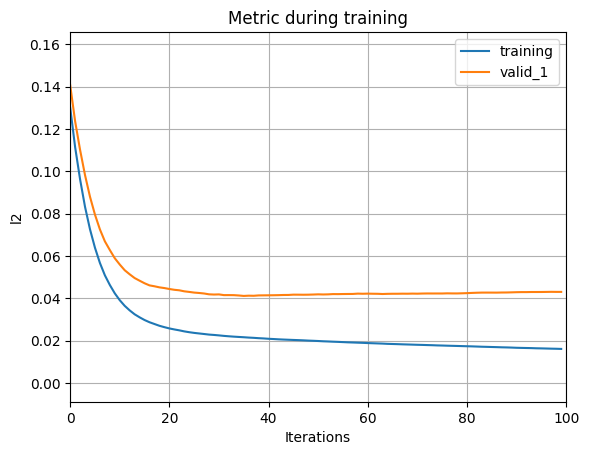

In [41]:
import lightgbm as lgb
lgb.plot_metric(lgb_model2)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50977 (\N{HANGUL SYLLABLE YUG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  func(*args

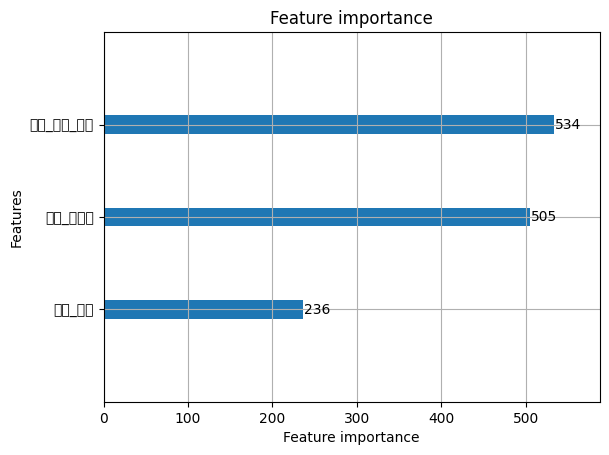

In [42]:
lgb.plot_importance(lgb_model2)